In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().any()

,0
CustomerID,False
Gender,False
Age,False
Annual Income (k$),False
Spending Score (1-100),False


In [ ]:
df.duplicated().sum()

0

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print(wcss)

[269981.28000000014]
[269981.28000000014, 181363.59595959607]
[269981.28000000014, 181363.59595959607, 106348.37306211119]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30241.34361793659]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30241.34361793659, 25036.417604033977]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30241.34361793659, 25036.417604033977, 21916.79478984372]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451

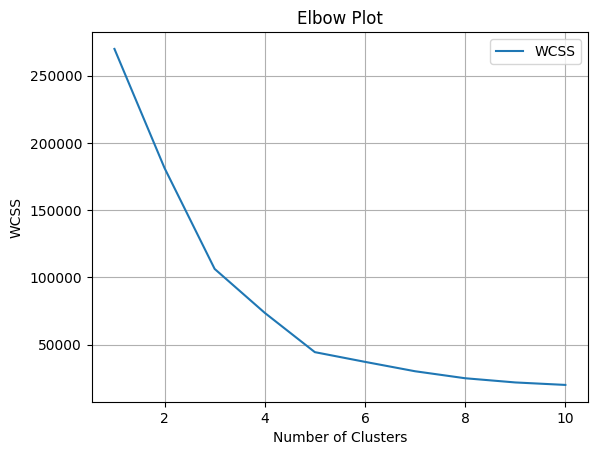

In [ ]:
# Plotting wcss using seaborn
sns.lineplot(x=list(range(1,11)), y=wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.grid(True)
plt.legend(['WCSS'])
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)
y_means

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

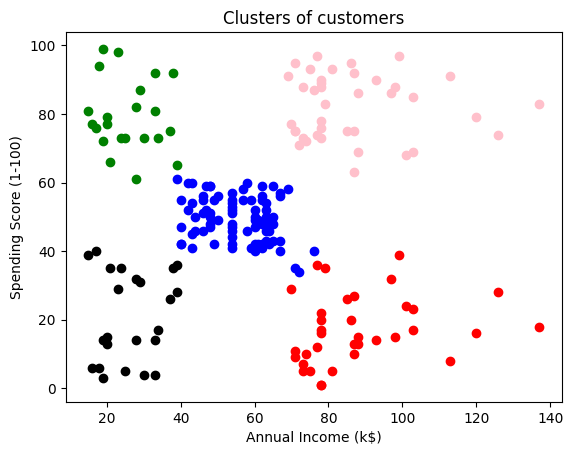

In [ ]:
plt.scatter(X[y_means == 0]['Annual Income (k$)'],
            X[y_means == 0]['Spending Score (1-100)'], color='black')
plt.scatter(X[y_means == 1]['Annual Income (k$)'],
            X[y_means == 1]['Spending Score (1-100)'], color='pink')
plt.scatter(X[y_means == 2]['Annual Income (k$)'],
            X[y_means == 2]['Spending Score (1-100)'], color='red')
plt.scatter(X[y_means == 3]['Annual Income (k$)'],
            X[y_means == 3]['Spending Score (1-100)'], color='green')
plt.scatter(X[y_means == 4]['Annual Income (k$)'],
            X[y_means == 4]['Spending Score (1-100)'], color='blue')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
df['Cluster'] = y_means
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [ ]:
from copy import deepcopy
dfc = deepcopy(df)
dfc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [ ]:
X = dfc.drop('Cluster', axis=1)
y = dfc['Cluster']
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
y.head()

,Cluster
0,0
1,3
2,0
3,3
4,0


In [ ]:
# Creating a Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

sc = StandardScaler()
oe = OrdinalEncoder()

lr_pipe1 = Pipeline([
    ('ct', ColumnTransformer([
        ('sc', sc, ['Age', 'Annual Income (k$)',
                    'Spending Score (1-100)']),
        ('oe', oe, ['Gender'])
    ])),
    ('lr', LogisticRegression())
])

lr_pipe1.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('sc', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['Gender'])])),
                ('lr', LogisticRegression())])

In [ ]:
lr_score = lr_pipe1.score(X_test, y_test) # Logistic Regression Score
print(f'Accuracy Score: {lr_score}')

Accuracy Score: 0.95


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_pipe2 = Pipeline([
    ('ct', ColumnTransformer([
        ('sc', sc, ['Age', 'Annual Income (k$)',
                    'Spending Score (1-100)']),
        ('oe', oe, ['Gender'])
    ])),
    ('dt', DecisionTreeClassifier())
])

dt_pipe2.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('sc', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['Gender'])])),
                ('dt', DecisionTreeClassifier())])

In [ ]:
dt_score = dt_pipe2.score(X_test, y_test) # Decision Tree Score
print(f'Accuracy Score: {dt_score}')

Accuracy Score: 0.95


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe3 = Pipeline([
    ('ct', ColumnTransformer([
        ('sc', sc, ['Age', 'Annual Income (k$)',
                    'Spending Score (1-100)']),
        ('oe', oe, ['Gender'])
    ])),
    ('rf', RandomForestClassifier())
])

rf_pipe3.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('sc', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['Gender'])])),
                ('rf', RandomForestClassifier())])

In [ ]:
rf_score = rf_pipe3.score(X_test, y_test) # Random Forest Score
print(f'Accuracy Score: {rf_score}')

Accuracy Score: 0.95


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_pipe4 = Pipeline([
    ('ct', ColumnTransformer([
        ('sc', sc, ['Age', 'Annual Income (k$)',
                    'Spending Score (1-100)']),
        ('oe', oe, ['Gender'])
    ])),
    ('ada', AdaBoostClassifier())
])

ada_pipe4.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('sc', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['Gender'])])),
                ('ada', AdaBoostClassifier())])

In [ ]:
ada_score = ada_pipe4.score(X_test, y_test) # AdaBoost Score
print(f'Accuracy Score: {ada_score}')

Accuracy Score: 0.925


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipe5 = Pipeline([
    ('ct', ColumnTransformer([
        ('sc', sc, ['Age', 'Annual Income (k$)',
                    'Spending Score (1-100)']),
        ('oe', oe, ['Gender'])
    ])),
    ('gb', GradientBoostingClassifier())
])

gb_pipe5.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('sc', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['Gender'])])),
                ('gb', GradientBoostingClassifier())])

In [ ]:
gb_score = gb_pipe5.score(X_test, y_test) # Gradient Boosting Score
print(f'Accuracy Score: {gb_score}')

Accuracy Score: 0.975


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipe6 = Pipeline([
    ('ct', ColumnTransformer([
        ('sc', sc, ['Age', 'Annual Income (k$)',
                    'Spending Score (1-100)']),
        ('oe', oe, ['Gender']),
    ], remainder='passthrough')),
    ('knn', KNeighborsClassifier())
])

knn_pipe6.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['Gender'])])),
                ('knn', KNeighborsClassifier())])

In [ ]:
knn_score = knn_pipe6.score(X_test, y_test) # KNeighbors Score
print(f'Accuracy Score: {knn_score}')

Accuracy Score: 0.675


In [ ]:
from sklearn.svm import SVC

svc_pipe7 = Pipeline([
    ('ct', ColumnTransformer([
        ('sc', sc, ['Age', 'Annual Income (k$)',
                    'Spending Score (1-100)']),
        ('oe', oe, ['Gender']),
    ], remainder='passthrough')),
    ('svc', SVC())
])

svc_pipe7.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['Gender'])])),
                ('svc', SVC())])

In [ ]:
svc_score = svc_pipe7.score(X_test, y_test) # Support Vector Score
print(f'Accuracy Score: {svc_score}')

Accuracy Score: 0.625


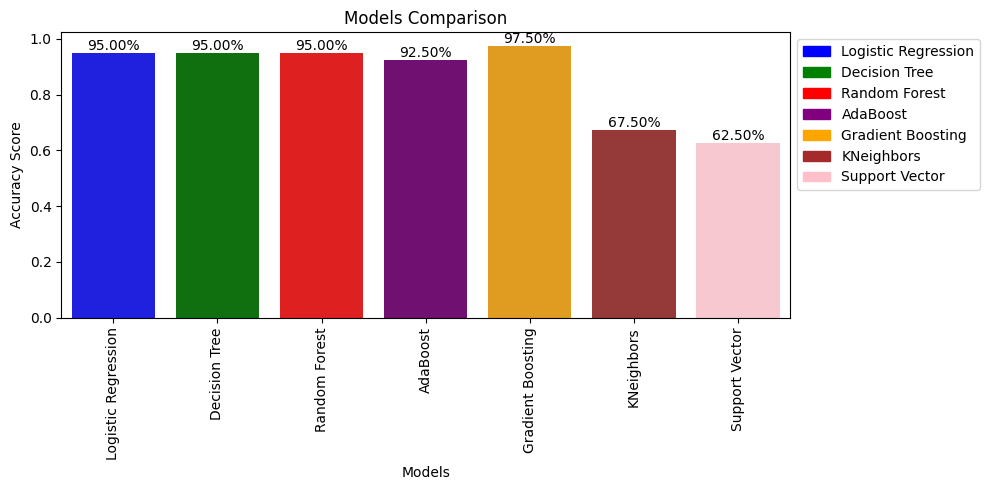

In [73]:
plt.figure(figsize=(10,5))

models = ['Logistic Regression', 'Decision Tree', 'Random Forest',
          'AdaBoost', 'Gradient Boosting', 'KNeighbors', 'Support Vector']
scores = [lr_score, dt_score, rf_score, ada_score, gb_score, knn_score,
          svc_score]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink']

sns.barplot(x=models, y=scores, palette=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Models Comparison')
plt.xticks(rotation=90)

for i in range(len(models)):
  plt.text(i, scores[i], f'{scores[i]*100:.2f}%', ha='center', va='bottom')

handles = [plt.Rectangle((0,0),1,1,
                         color=colors[i]) for i in range(len(models))]
plt.legend(handles, models, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()